--------------------------------------------
# truths.tsv file structure
--------------------------------------------
id|timestamp|time_scraped|is_retruth|is_reply|author|like_count|retruth_count|reply_count|text|external_id|url|truth_retruthed
- id - unique integer id 
- timestamp - datetime of when the Truth was posted
- time_scraped - datetime of when the Truth was added to the data
- is_retruth - boolean indicating whether the Truth is a ReTruth
- is_reply - boolean indicating whether the Truth is a reply
- author - int foreign key referencing the user who posted the Truth
- like_count - int of number of likes associated with Truth at time of scrape
- retruth_count - int of number of ReTruths associated with Truth at time of scrape
- text - text of truth
- external_id -  int of Truth Social's unique id associated with Truth
- url - text of url to Truth
- truth_retruthed - int foreign key to Truth current Truth is ReTruthing. If the current Truth is not a ReTruth, this field is set to -1

In [1]:
from helper.load_tsv import load_tsv
df_truths = load_tsv("../../Data/OriginalData/truths.tsv")
#drop url column
df_truths = df_truths.drop(columns=["url"])
initail_shape = df_truths.shape
print(f"Initial dataframe size: {initail_shape}")

📄 File: ../../Data/OriginalData/truths.tsv
------------------------------------------------------------


c:\Users\johan\OneDrive\Desktop\deep_learning_for_social_analytics\TrueGraphDynamics\Preperation\Analyes\helper\load_tsv.py:8: ParserWarning: Skipping line 19709: field larger than field limit (131072)

  df = pd.read_csv(path, sep="\t", engine="python", on_bad_lines="warn")
c:\Users\johan\OneDrive\Desktop\deep_learning_for_social_analytics\TrueGraphDynamics\Preperation\Analyes\helper\load_tsv.py:8: ParserWarning: Skipping line 171640: field larger than field limit (131072)

  df = pd.read_csv(path, sep="\t", engine="python", on_bad_lines="warn")
c:\Users\johan\OneDrive\Desktop\deep_learning_for_social_analytics\TrueGraphDynamics\Preperation\Analyes\helper\load_tsv.py:8: ParserWarning: Skipping line 339779: field larger than field limit (131072)

  df = pd.read_csv(path, sep="\t", engine="python", on_bad_lines="warn")
c:\Users\johan\OneDrive\Desktop\deep_learning_for_social_analytics\TrueGraphDynamics\Preperation\Analyes\helper\load_tsv.py:8: ParserWarning: Skipping line 456133: field 

Rows: 845,060
Columns: 13

📌 Data types:
id                  int64
timestamp          object
time_scraped       object
is_retruth         object
is_reply           object
author              int64
like_count          int64
retruth_count       int64
reply_count         int64
text               object
external_id         int64
url                object
truth_retruthed     int64
dtype: object

⚠️ Missing values:
text    2
dtype: int64

🧠 Memory usage:
542.1184635162354 mega_bytes

👀 Head:
       id            timestamp                time_scraped is_retruth  \
0  703265  2022-05-14 00:00:00  2022-11-01 15:48:16.829245          t   
1  807614  2022-03-27 00:00:00  2022-11-23 10:54:36.865046          t   
2  807615  2022-03-29 00:00:00  2022-11-23 10:55:11.613249          t   
3  807618  2022-03-29 00:00:00  2022-11-23 10:56:29.134825          t   
4  807619  2022-03-29 00:00:00  2022-11-23 10:57:20.028953          f   

  is_reply  author  like_count  retruth_count  reply_count  \
0       

In [2]:

# Zeilen entfernen, bei denen Text kürzer als 3 Zeichen ist
df_truths = df_truths[df_truths["text"].str.len() >= 3]

print(f"Dataframe size after removing invalid text: {df_truths.shape}")
print(f"Number of removed rows: {initail_shape[0] - df_truths.shape[0]}")
print("compression ratio:", (initail_shape[0] - df_truths.shape[0]) / initail_shape[0])

Dataframe size after removing invalid text: (844316, 12)
Number of removed rows: 744
compression ratio: 0.0008804108584005869


Timestamps checked.
Total number of timestamps: 762028
Number of invalid timestamps: 0
Number of valid timestamps: 762028
Rows with invalid timestamps:
<bound method NDFrame.head of Series([], Name: timestamp, dtype: object)>
Number of valid timestamps for histogram: 762028
0   2022-05-14
1   2022-03-27
2   2022-03-29
3   2022-03-29
4   2022-03-29
Name: timestamptime, dtype: datetime64[ns]


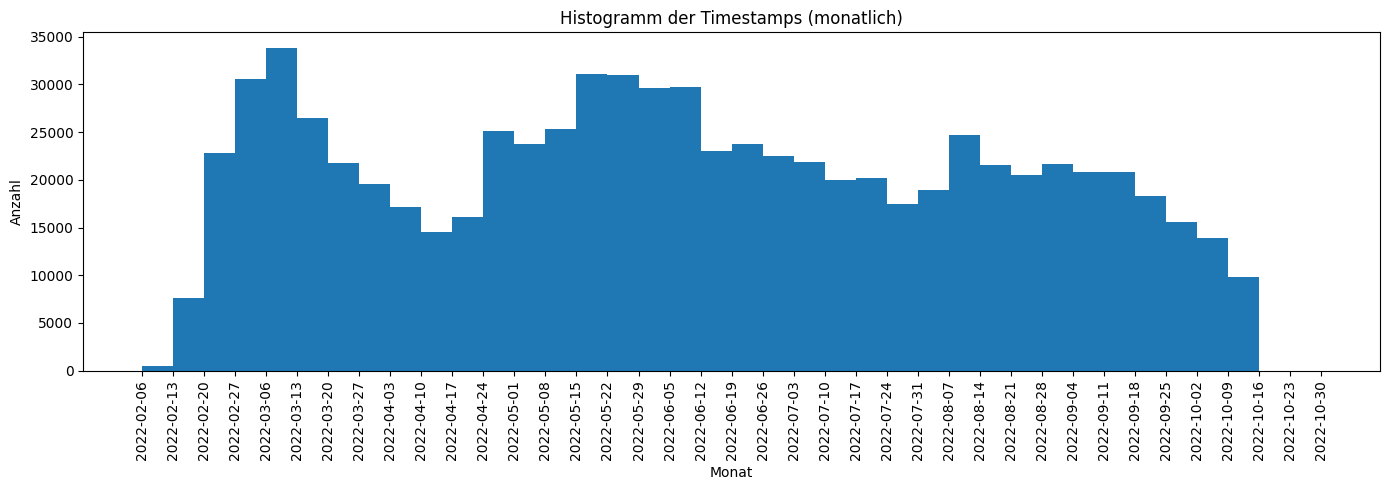

In [ ]:
#check if the timestamps are all valid
import pandas as pd
df_truths['timestamptime'] = pd.to_datetime(df_truths['timestamp'], errors='coerce')
invalid_timestamps = df_truths['timestamp'].isna().sum()
print("Timestamps checked.")
print(f"Total number of timestamps: {len(df_truths)}")
print(f"Number of invalid timestamps: {invalid_timestamps}")
print(f"Number of valid timestamps: {len(df_truths) - invalid_timestamps}")

#check why some timestamps are invalid
invalid_rows = df_truths[df_truths['timestamptime'].isna()]["timestamp"]
print("Rows with invalid timestamps:")
print(invalid_rows.head)
#plot histogram of valid timestamps monthly

import matplotlib.pyplot as plt
valid_timestamps = df_truths['timestamptime'].dropna()
print(f"Number of valid timestamps for histogram: {len(valid_timestamps)}")
print(valid_timestamps.head())

# Start- und Endzeit aus Series
start = valid_timestamps.min().replace(day=1)  # auf Monatsanfang runden
end = valid_timestamps.max() + pd.offsets.MonthEnd(0)  # auf Monatsende runden

# Monatliche Bins
bins = pd.date_range(start=start, end=end, freq="W")

# Histogramm
plt.figure(figsize=(14,5))
plt.hist(valid_timestamps, bins=bins)  # <-- direkt die Series verwenden
plt.xlabel("Week")
plt.ylabel("Number of truths")
plt.title("Histogramm of truths per week")
plt.xticks(bins, rotation=90)
plt.tight_layout()
plt.show()



In [4]:
#remove drop all rows with invalid timestamps
df_truths = df_truths.dropna(subset=['timestamptime'])
df_truths = df_truths.drop(columns=['timestamptime'])
print(f"Dataframe size after removing invalid timestamps: {df_truths.shape}")
print(f"Number of removed rows: {initail_shape[0] - df_truths.shape[0]}")
print("compression ratio:", (initail_shape[0] - df_truths.shape[0]) / initail_shape[0])

Dataframe size after removing invalid timestamps: (762028, 12)
Number of removed rows: 83032
compression ratio: 0.09825574515419024


In [5]:
#save cleaned dataframe
import os
from helper.load_tsv import save_tsv

# Create directory if it doesn't exist
os.makedirs("../../Data/ProcessedData", exist_ok=True)

df_truths.to_csv("../../Data/ProcessedData/truths_cleaned.tsv", sep="\t", index=False)
save_tsv(df_truths, "../../Data/ProcessedData/truths_cleaned.tsv")

✅ DataFrame saved to ../../Data/ProcessedData/truths_cleaned.tsv
